# Scikit-learn Exercise A (With Solutions)

Try to work through the exercise notebook with reference to the lesson notebook, and the scikit-learn documentation at: https://scikit-learn.org/stable/

If you are stuck, ask the instructor or a TA for help. If you'd like to work in groups then that's fine too.

## Preparation

We'll load in the datasets for you here...

In [44]:
# Digits image dataset
from sklearn.datasets import load_digits
digits = load_digits()

# BC-TCGA dataset
import pandas as pd
bc_df = pd.read_csv('BC-TCGA_prepared.csv', index_col=0)
bc_df = bc_df.dropna(axis='columns')

### A1. If we use 3 components for our PCA (and 3D plot the results accordingly) is the separation of digits better?

Text(0.5, 0, 'PC3')

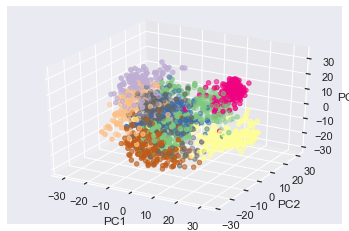

In [45]:
# Write your code here
# Refer to the PCA example in the lesson notebook

# Tell Jupyter to show plots without needing to plt.show()
%matplotlib inline
# We are going to use seaborn and pandas as in previous sessions
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# PCA is in the 'decomposition' module of sklearn
from sklearn import decomposition

# Convention says matrix X contains our data, and vector y our categories
X = digits.data
y = digits.target

# To run PCA we first create a PCA object, telling it we want 2 components
pca = decomposition.PCA(n_components=3)
# Now we .fit the PCA to our data
pca.fit(X)
# Now we can get the position of our data in the PCA space with .transform
X_pca = pca.transform(X)

# We need this for 3D plots...
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=X_pca[:,0], ys=X_pca[:,1], zs=X_pca[:,2], c=y, cmap='Accent')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

### A2. Is the Isomap method better than MDS for a 2D projection? (hint - Isomap considers n neighbors of each point, you will need to try different n.

In [46]:
# Write your code here
# You will need to modify the MDS example to use the Isomap method
# Refer to: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.manifold
from sklearn import manifold

X = digits.data
y = digits.target

# We'll fit to 2 components, for a 2D plot
m = manifold.Isomap(n_components=2, n_neighbors=5)
# This time we will fit and transform our data in 1 step
X_mds = m.fit_transform(X)

# Into a dataframe, and another simple plot...
X_mds_df = pd.DataFrame(data=X_mds, columns= ['D1', 'D2'])
X_mds_df['Target'] = y
sns.lmplot(x="D1", y="D2", data=X_mds_df, hue='Target', fit_reg=False)

### A3. Run a 2D PCA on the BC-TCGA dataset and plot. What does the plot tell you about the difficulty (or not) of classifying the samples as tumour or normal?

In [47]:
# Step 1 - extract the features and class labels to X and y
# Write your code here
y=bc_df['CLASS'].values
X=bc_df.drop(columns=['CLASS']).values

In [49]:
# Step 2 - Run a PCA analysis and plot, referring tot the PCA example in the lesson notebook
pca = decomposition.PCA(n_components=2)
pca.fit(X)

# Now we can get the position of our data in the PCA space with .transform
X_pca = pca.transform(X)

# Convert it into a pandas dataframe with nice column labels, and add the target categories
X_pca_df = pd.DataFrame(data=X_pca, columns= ['PC1', 'PC2'])
X_pca_df['Target'] = y

# A simple scatter plot... we don't want seaborn to fit regression lines
sns.lmplot(x="PC1", y="PC2", data=X_pca_df, hue='Target', fit_reg=False)

**Bonus Points - Perform a PCA with 10 components, and make a plot showing the explained_variance of each principal component. How many principal components must be used to explain at least 1/3 of the variance?**

In [56]:
# Fit with 10 components
pca = decomposition.PCA(n_components=10)
pca.fit(X)

pca.explained_variance_ratio_

array([0.11792828, 0.10324857, 0.04331551, 0.02984586, 0.0279128 ,
       0.02355211, 0.0194349 , 0.01845746, 0.01660457, 0.01469517])

In [80]:
# Plot the components vs explained variance
df_var = pd.DataFrame(pca.explained_variance_ratio_, columns=['explained var']) 
df_var['component'] = [1,2,3,4,5,6,7,8,9,10]   
ax = sns.barplot(x="component", y="explained var", data=df_var)

In [81]:
# Cumulative sum to find how many to reach 1/3
np.cumsum(df_var['explained var'])

0    0.117928
1    0.221177
2    0.264492
3    0.294338
4    0.322251
5    0.345803
6    0.365238
7    0.383695
8    0.400300
9    0.414995
Name: explained var, dtype: float64

So the answer here is 6 components (the row numbers are starting from 0!)